In [4]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load in the data and take a look
data = pd.read_csv('C:/Users/kenre/MSBA_Capstone_Python/transactions-cleaned.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64555 entries, 0 to 64554
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   trans_id        64555 non-null  int64  
 1   created_date    64555 non-null  object 
 2   expires_date    64555 non-null  object 
 3   user_id         64424 non-null  float64
 4   product_name    64555 non-null  object 
 5   payment_method  64555 non-null  object 
 6   sub_id          64555 non-null  int64  
 7   amount          64555 non-null  float64
 8   status          64555 non-null  object 
 9   coupon_id       64555 non-null  int64  
 10  user_ctry       64555 non-null  object 
 11  user_logins     64555 non-null  int64  
 12  on_discord      64555 non-null  int64  
 13  hear_about      64555 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 6.9+ MB


In [6]:
# look at the head
data.head()

,trans_id,created_date,expires_date,user_id,product_name,payment_method,sub_id,amount,status,coupon_id,user_ctry,user_logins,on_discord,hear_about
0,3,5/8/2020 1:43,6/8/2020 23:59,4.0,ROIC Monthly,Debit/Credit Card (Stripe),2,6.99,complete,0,US,50,0,Unknown
1,7,5/9/2020 18:29,6/9/2020 23:59,6.0,ROIC Monthly,Debit/Credit Card (Stripe),5,7.49,complete,0,US,49,0,Unknown
2,9,5/9/2020 19:15,6/9/2020 23:59,7.0,ROIC Monthly,Debit/Credit Card (Stripe),6,7.49,complete,0,US,14,0,Unknown
3,12,5/9/2020 20:38,6/9/2020 23:59,9.0,ROIC Monthly,Debit/Credit Card (Stripe),8,7.49,complete,0,GB,3,0,Unknown
4,15,5/9/2020 21:10,6/9/2020 23:59,11.0,ROIC Monthly,Debit/Credit Card (Stripe),10,7.49,pending,2356,US,1,0,Unknown


In [7]:
# change created_date to datetime format
data['created_date'] = pd.to_datetime(data['created_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64555 entries, 0 to 64554
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   trans_id        64555 non-null  int64         
 1   created_date    64555 non-null  datetime64[ns]
 2   expires_date    64555 non-null  object        
 3   user_id         64424 non-null  float64       
 4   product_name    64555 non-null  object        
 5   payment_method  64555 non-null  object        
 6   sub_id          64555 non-null  int64         
 7   amount          64555 non-null  float64       
 8   status          64555 non-null  object        
 9   coupon_id       64555 non-null  int64         
 10  user_ctry       64555 non-null  object        
 11  user_logins     64555 non-null  int64         
 12  on_discord      64555 non-null  int64         
 13  hear_about      64555 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)


In [8]:
data.head()

,trans_id,created_date,expires_date,user_id,product_name,payment_method,sub_id,amount,status,coupon_id,user_ctry,user_logins,on_discord,hear_about
0,3,2020-05-08 01:43:00,6/8/2020 23:59,4.0,ROIC Monthly,Debit/Credit Card (Stripe),2,6.99,complete,0,US,50,0,Unknown
1,7,2020-05-09 18:29:00,6/9/2020 23:59,6.0,ROIC Monthly,Debit/Credit Card (Stripe),5,7.49,complete,0,US,49,0,Unknown
2,9,2020-05-09 19:15:00,6/9/2020 23:59,7.0,ROIC Monthly,Debit/Credit Card (Stripe),6,7.49,complete,0,US,14,0,Unknown
3,12,2020-05-09 20:38:00,6/9/2020 23:59,9.0,ROIC Monthly,Debit/Credit Card (Stripe),8,7.49,complete,0,GB,3,0,Unknown
4,15,2020-05-09 21:10:00,6/9/2020 23:59,11.0,ROIC Monthly,Debit/Credit Card (Stripe),10,7.49,pending,2356,US,1,0,Unknown


In [9]:
# drop transaction expiration date from dataframe
data.drop('expires_date', axis=1)

,trans_id,created_date,user_id,product_name,payment_method,sub_id,amount,status,coupon_id,user_ctry,user_logins,on_discord,hear_about
0,3,2020-05-08 01:43:00,4.0,ROIC Monthly,Debit/Credit Card (Stripe),2,6.99,complete,0,US,50,0,Unknown
1,7,2020-05-09 18:29:00,6.0,ROIC Monthly,Debit/Credit Card (Stripe),5,7.49,complete,0,US,49,0,Unknown
2,9,2020-05-09 19:15:00,7.0,ROIC Monthly,Debit/Credit Card (Stripe),6,7.49,complete,0,US,14,0,Unknown
3,12,2020-05-09 20:38:00,9.0,ROIC Monthly,Debit/Credit Card (Stripe),8,7.49,complete,0,GB,3,0,Unknown
4,15,2020-05-09 21:10:00,11.0,ROIC Monthly,Debit/Credit Card (Stripe),10,7.49,pending,2356,US,1,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64550,73466,2022-07-25 23:44:00,4187.0,ROIC Monthly,Debit/Credit Card (Stripe),4789,9.99,complete,0,US,482,1,YouTube
64551,73467,2022-07-26 00:19:00,6432.0,ROIC Monthly,Debit/Credit Card (Stripe),7596,11.99,complete,0,CA,135,1,YouTube
64552,73468,2022-07-26 00:28:00,2521.0,ROIC Monthly,Debit/Credit Card (Stripe),2828,9.99,complete,0,US,179,1,Unknown
64553,73469,2022-07-26 00:29:00,5506.0,ROIC Monthly,Debit/Credit Card (Stripe),6356,10.99,complete,6602,US,39,1,YouTube


In [10]:
# drop rows with no user_id
data = data.dropna(subset=['user_id'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64424 entries, 0 to 64554
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   trans_id        64424 non-null  int64         
 1   created_date    64424 non-null  datetime64[ns]
 2   expires_date    64424 non-null  object        
 3   user_id         64424 non-null  float64       
 4   product_name    64424 non-null  object        
 5   payment_method  64424 non-null  object        
 6   sub_id          64424 non-null  int64         
 7   amount          64424 non-null  float64       
 8   status          64424 non-null  object        
 9   coupon_id       64424 non-null  int64         
 10  user_ctry       64424 non-null  object        
 11  user_logins     64424 non-null  int64         
 12  on_discord      64424 non-null  int64         
 13  hear_about      64424 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)


In [11]:
# create a transaction month
import datetime as dt

#function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)

#apply the function
data['trans_month'] = data['created_date'].apply(get_month)
data.tail()

,trans_id,created_date,expires_date,user_id,product_name,payment_method,sub_id,amount,status,coupon_id,user_ctry,user_logins,on_discord,hear_about,trans_month
64550,73466,2022-07-25 23:44:00,8/25/2022 23:59,4187.0,ROIC Monthly,Debit/Credit Card (Stripe),4789,9.99,complete,0,US,482,1,YouTube,2022-07-01
64551,73467,2022-07-26 00:19:00,8/25/2022 23:59,6432.0,ROIC Monthly,Debit/Credit Card (Stripe),7596,11.99,complete,0,CA,135,1,YouTube,2022-07-01
64552,73468,2022-07-26 00:28:00,8/25/2022 23:59,2521.0,ROIC Monthly,Debit/Credit Card (Stripe),2828,9.99,complete,0,US,179,1,Unknown,2022-07-01
64553,73469,2022-07-26 00:29:00,8/25/2022 23:59,5506.0,ROIC Monthly,Debit/Credit Card (Stripe),6356,10.99,complete,6602,US,39,1,YouTube,2022-07-01
64554,73470,2022-07-26 00:40:00,8/25/2022 23:59,6433.0,ROIC Monthly,Debit/Credit Card (Stripe),7597,11.99,complete,0,CA,40,1,YouTube,2022-07-01


In [12]:
# create a column index with the minimum invoice date aka first time customer was acquired
data['cohort_month'] = data.groupby('user_id')['trans_month'].transform('min')
data.head(30)

,trans_id,created_date,expires_date,user_id,product_name,payment_method,sub_id,amount,status,coupon_id,user_ctry,user_logins,on_discord,hear_about,trans_month,cohort_month
0,3,2020-05-08 01:43:00,6/8/2020 23:59,4.0,ROIC Monthly,Debit/Credit Card (Stripe),2,6.99,complete,0,US,50,0,Unknown,2020-05-01,2020-05-01
1,7,2020-05-09 18:29:00,6/9/2020 23:59,6.0,ROIC Monthly,Debit/Credit Card (Stripe),5,7.49,complete,0,US,49,0,Unknown,2020-05-01,2020-05-01
2,9,2020-05-09 19:15:00,6/9/2020 23:59,7.0,ROIC Monthly,Debit/Credit Card (Stripe),6,7.49,complete,0,US,14,0,Unknown,2020-05-01,2020-05-01
3,12,2020-05-09 20:38:00,6/9/2020 23:59,9.0,ROIC Monthly,Debit/Credit Card (Stripe),8,7.49,complete,0,GB,3,0,Unknown,2020-05-01,2020-05-01
4,15,2020-05-09 21:10:00,6/9/2020 23:59,11.0,ROIC Monthly,Debit/Credit Card (Stripe),10,7.49,pending,2356,US,1,0,Unknown,2020-05-01,2020-05-01
5,17,2020-05-09 21:27:00,6/9/2020 23:59,12.0,ROIC Monthly,Debit/Credit Card (Stripe),11,7.49,complete,0,US,67,0,Unknown,2020-05-01,2020-05-01
6,19,2020-05-09 21:32:00,6/9/2020 23:59,13.0,ROIC Monthly,Debit/Credit Card (Stripe),12,7.49,complete,0,US,42,0,Instagram,2020-05-01,2020-05-01
7,21,2020-05-09 21:34:00,6/9/2020 23:59,14.0,ROIC Monthly,Debit/Credit Card (Stripe),13,7.49,complete,0,US,16,0,Unknown,2020-05-01,2020-05-01
8,24,2020-05-09 21:50:00,5/8/2020 21:50,16.0,ROIC Monthly,Debit/Credit Card (Stripe),15,7.49,failed,0,IE,175,0,Word of Mouth,2020-05-01,2020-05-01
9,25,2020-05-09 21:51:00,6/9/2020 23:59,16.0,ROIC Monthly,Debit/Credit Card (Stripe),15,7.49,complete,0,IE,175,0,Word of Mouth,2020-05-01,2020-05-01


In [13]:
data.tail()

,trans_id,created_date,expires_date,user_id,product_name,payment_method,sub_id,amount,status,coupon_id,user_ctry,user_logins,on_discord,hear_about,trans_month,cohort_month
64550,73466,2022-07-25 23:44:00,8/25/2022 23:59,4187.0,ROIC Monthly,Debit/Credit Card (Stripe),4789,9.99,complete,0,US,482,1,YouTube,2022-07-01,2021-02-01
64551,73467,2022-07-26 00:19:00,8/25/2022 23:59,6432.0,ROIC Monthly,Debit/Credit Card (Stripe),7596,11.99,complete,0,CA,135,1,YouTube,2022-07-01,2021-08-01
64552,73468,2022-07-26 00:28:00,8/25/2022 23:59,2521.0,ROIC Monthly,Debit/Credit Card (Stripe),2828,9.99,complete,0,US,179,1,Unknown,2022-07-01,2020-12-01
64553,73469,2022-07-26 00:29:00,8/25/2022 23:59,5506.0,ROIC Monthly,Debit/Credit Card (Stripe),6356,10.99,complete,6602,US,39,1,YouTube,2022-07-01,2021-05-01
64554,73470,2022-07-26 00:40:00,8/25/2022 23:59,6433.0,ROIC Monthly,Debit/Credit Card (Stripe),7597,11.99,complete,0,CA,40,1,YouTube,2022-07-01,2021-08-01


In [14]:
# create a data element function to get a series for subtraction
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [15]:
# get date elements for our cohort and invoice columns
trans_day,trans_month,trans_year = get_date_elements(data, 'trans_month')
cohort_day,cohort_month,cohort_year = get_date_elements(data, 'cohort_month')

In [16]:
# check the series
cohort_month[:10]

0    5
1    5
2    5
3    5
4    5
5    5
6    5
7    5
8    5
9    5
Name: cohort_month, dtype: int64

In [17]:
# create a cohort index
# this will show us when a user was acquired
year_diff = trans_year - cohort_year
month_diff = trans_month - cohort_month

# multiply a year difference by 12
# add a 1 to avoid 0 month subs
data['cohort_index'] = year_diff*12+month_diff+1
data.head(30)

,trans_id,created_date,expires_date,user_id,product_name,payment_method,sub_id,amount,status,coupon_id,user_ctry,user_logins,on_discord,hear_about,trans_month,cohort_month,cohort_index
0,3,2020-05-08 01:43:00,6/8/2020 23:59,4.0,ROIC Monthly,Debit/Credit Card (Stripe),2,6.99,complete,0,US,50,0,Unknown,2020-05-01,2020-05-01,1
1,7,2020-05-09 18:29:00,6/9/2020 23:59,6.0,ROIC Monthly,Debit/Credit Card (Stripe),5,7.49,complete,0,US,49,0,Unknown,2020-05-01,2020-05-01,1
2,9,2020-05-09 19:15:00,6/9/2020 23:59,7.0,ROIC Monthly,Debit/Credit Card (Stripe),6,7.49,complete,0,US,14,0,Unknown,2020-05-01,2020-05-01,1
3,12,2020-05-09 20:38:00,6/9/2020 23:59,9.0,ROIC Monthly,Debit/Credit Card (Stripe),8,7.49,complete,0,GB,3,0,Unknown,2020-05-01,2020-05-01,1
4,15,2020-05-09 21:10:00,6/9/2020 23:59,11.0,ROIC Monthly,Debit/Credit Card (Stripe),10,7.49,pending,2356,US,1,0,Unknown,2020-05-01,2020-05-01,1
5,17,2020-05-09 21:27:00,6/9/2020 23:59,12.0,ROIC Monthly,Debit/Credit Card (Stripe),11,7.49,complete,0,US,67,0,Unknown,2020-05-01,2020-05-01,1
6,19,2020-05-09 21:32:00,6/9/2020 23:59,13.0,ROIC Monthly,Debit/Credit Card (Stripe),12,7.49,complete,0,US,42,0,Instagram,2020-05-01,2020-05-01,1
7,21,2020-05-09 21:34:00,6/9/2020 23:59,14.0,ROIC Monthly,Debit/Credit Card (Stripe),13,7.49,complete,0,US,16,0,Unknown,2020-05-01,2020-05-01,1
8,24,2020-05-09 21:50:00,5/8/2020 21:50,16.0,ROIC Monthly,Debit/Credit Card (Stripe),15,7.49,failed,0,IE,175,0,Word of Mouth,2020-05-01,2020-05-01,1
9,25,2020-05-09 21:51:00,6/9/2020 23:59,16.0,ROIC Monthly,Debit/Credit Card (Stripe),15,7.49,complete,0,IE,175,0,Word of Mouth,2020-05-01,2020-05-01,1


In [18]:
data.tail()

,trans_id,created_date,expires_date,user_id,product_name,payment_method,sub_id,amount,status,coupon_id,user_ctry,user_logins,on_discord,hear_about,trans_month,cohort_month,cohort_index
64550,73466,2022-07-25 23:44:00,8/25/2022 23:59,4187.0,ROIC Monthly,Debit/Credit Card (Stripe),4789,9.99,complete,0,US,482,1,YouTube,2022-07-01,2021-02-01,18
64551,73467,2022-07-26 00:19:00,8/25/2022 23:59,6432.0,ROIC Monthly,Debit/Credit Card (Stripe),7596,11.99,complete,0,CA,135,1,YouTube,2022-07-01,2021-08-01,12
64552,73468,2022-07-26 00:28:00,8/25/2022 23:59,2521.0,ROIC Monthly,Debit/Credit Card (Stripe),2828,9.99,complete,0,US,179,1,Unknown,2022-07-01,2020-12-01,20
64553,73469,2022-07-26 00:29:00,8/25/2022 23:59,5506.0,ROIC Monthly,Debit/Credit Card (Stripe),6356,10.99,complete,6602,US,39,1,YouTube,2022-07-01,2021-05-01,15
64554,73470,2022-07-26 00:40:00,8/25/2022 23:59,6433.0,ROIC Monthly,Debit/Credit Card (Stripe),7597,11.99,complete,0,CA,40,1,YouTube,2022-07-01,2021-08-01,12


In [19]:
# count the user_id by grouping by cohort month and cohort index
cohort_data = data.groupby(['cohort_month','cohort_index'])['user_id'].apply(pd.Series.nunique).reset_index()
cohort_data

,cohort_month,cohort_index,user_id
0,2020-05-01,1,351
1,2020-05-01,2,294
2,2020-05-01,3,274
3,2020-05-01,4,246
4,2020-05-01,5,223
...,...,...,...
373,2022-05-01,2,9
374,2022-05-01,3,7
375,2022-06-01,1,12
376,2022-06-01,2,5


In [20]:
# create a pivot table
cohort_table = cohort_data.pivot(index='cohort_month', columns=['cohort_index'], values='user_id')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
cohort_month,,,,,,,,,,,,,,,,,,,,,
2020-05-01,351.0,294.0,274.0,246.0,223.0,204.0,200.0,194.0,190.0,186.0,...,146.0,141.0,139.0,135.0,120.0,115.0,110.0,106.0,98.0,76.0
2020-06-01,405.0,328.0,289.0,258.0,229.0,224.0,214.0,213.0,214.0,206.0,...,166.0,166.0,166.0,150.0,144.0,139.0,134.0,127.0,106.0,NaN
2020-07-01,164.0,141.0,123.0,114.0,111.0,115.0,113.0,112.0,110.0,105.0,...,90.0,87.0,85.0,79.0,74.0,71.0,69.0,52.0,NaN,NaN
2020-08-01,100.0,78.0,73.0,69.0,66.0,64.0,64.0,62.0,63.0,57.0,...,47.0,44.0,41.0,40.0,40.0,38.0,28.0,NaN,NaN,NaN
2020-09-01,144.0,119.0,112.0,110.0,105.0,101.0,99.0,94.0,92.0,89.0,...,74.0,69.0,67.0,67.0,63.0,58.0,NaN,NaN,NaN,NaN
2020-10-01,158.0,140.0,137.0,135.0,127.0,125.0,118.0,117.0,117.0,113.0,...,101.0,95.0,94.0,91.0,43.0,NaN,NaN,NaN,NaN,NaN
2020-11-01,308.0,280.0,263.0,239.0,243.0,235.0,230.0,222.0,220.0,220.0,...,163.0,152.0,145.0,119.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-01,672.0,564.0,517.0,463.0,430.0,410.0,387.0,368.0,360.0,346.0,...,229.0,215.0,171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,404.0,315.0,296.0,273.0,266.0,245.0,237.0,225.0,215.0,209.0,...,147.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# change axis titles to Month Year
cohort_table.index = cohort_table.index.strftime('%B %Y')

<AxesSubplot:xlabel='cohort_index', ylabel='cohort_month'>

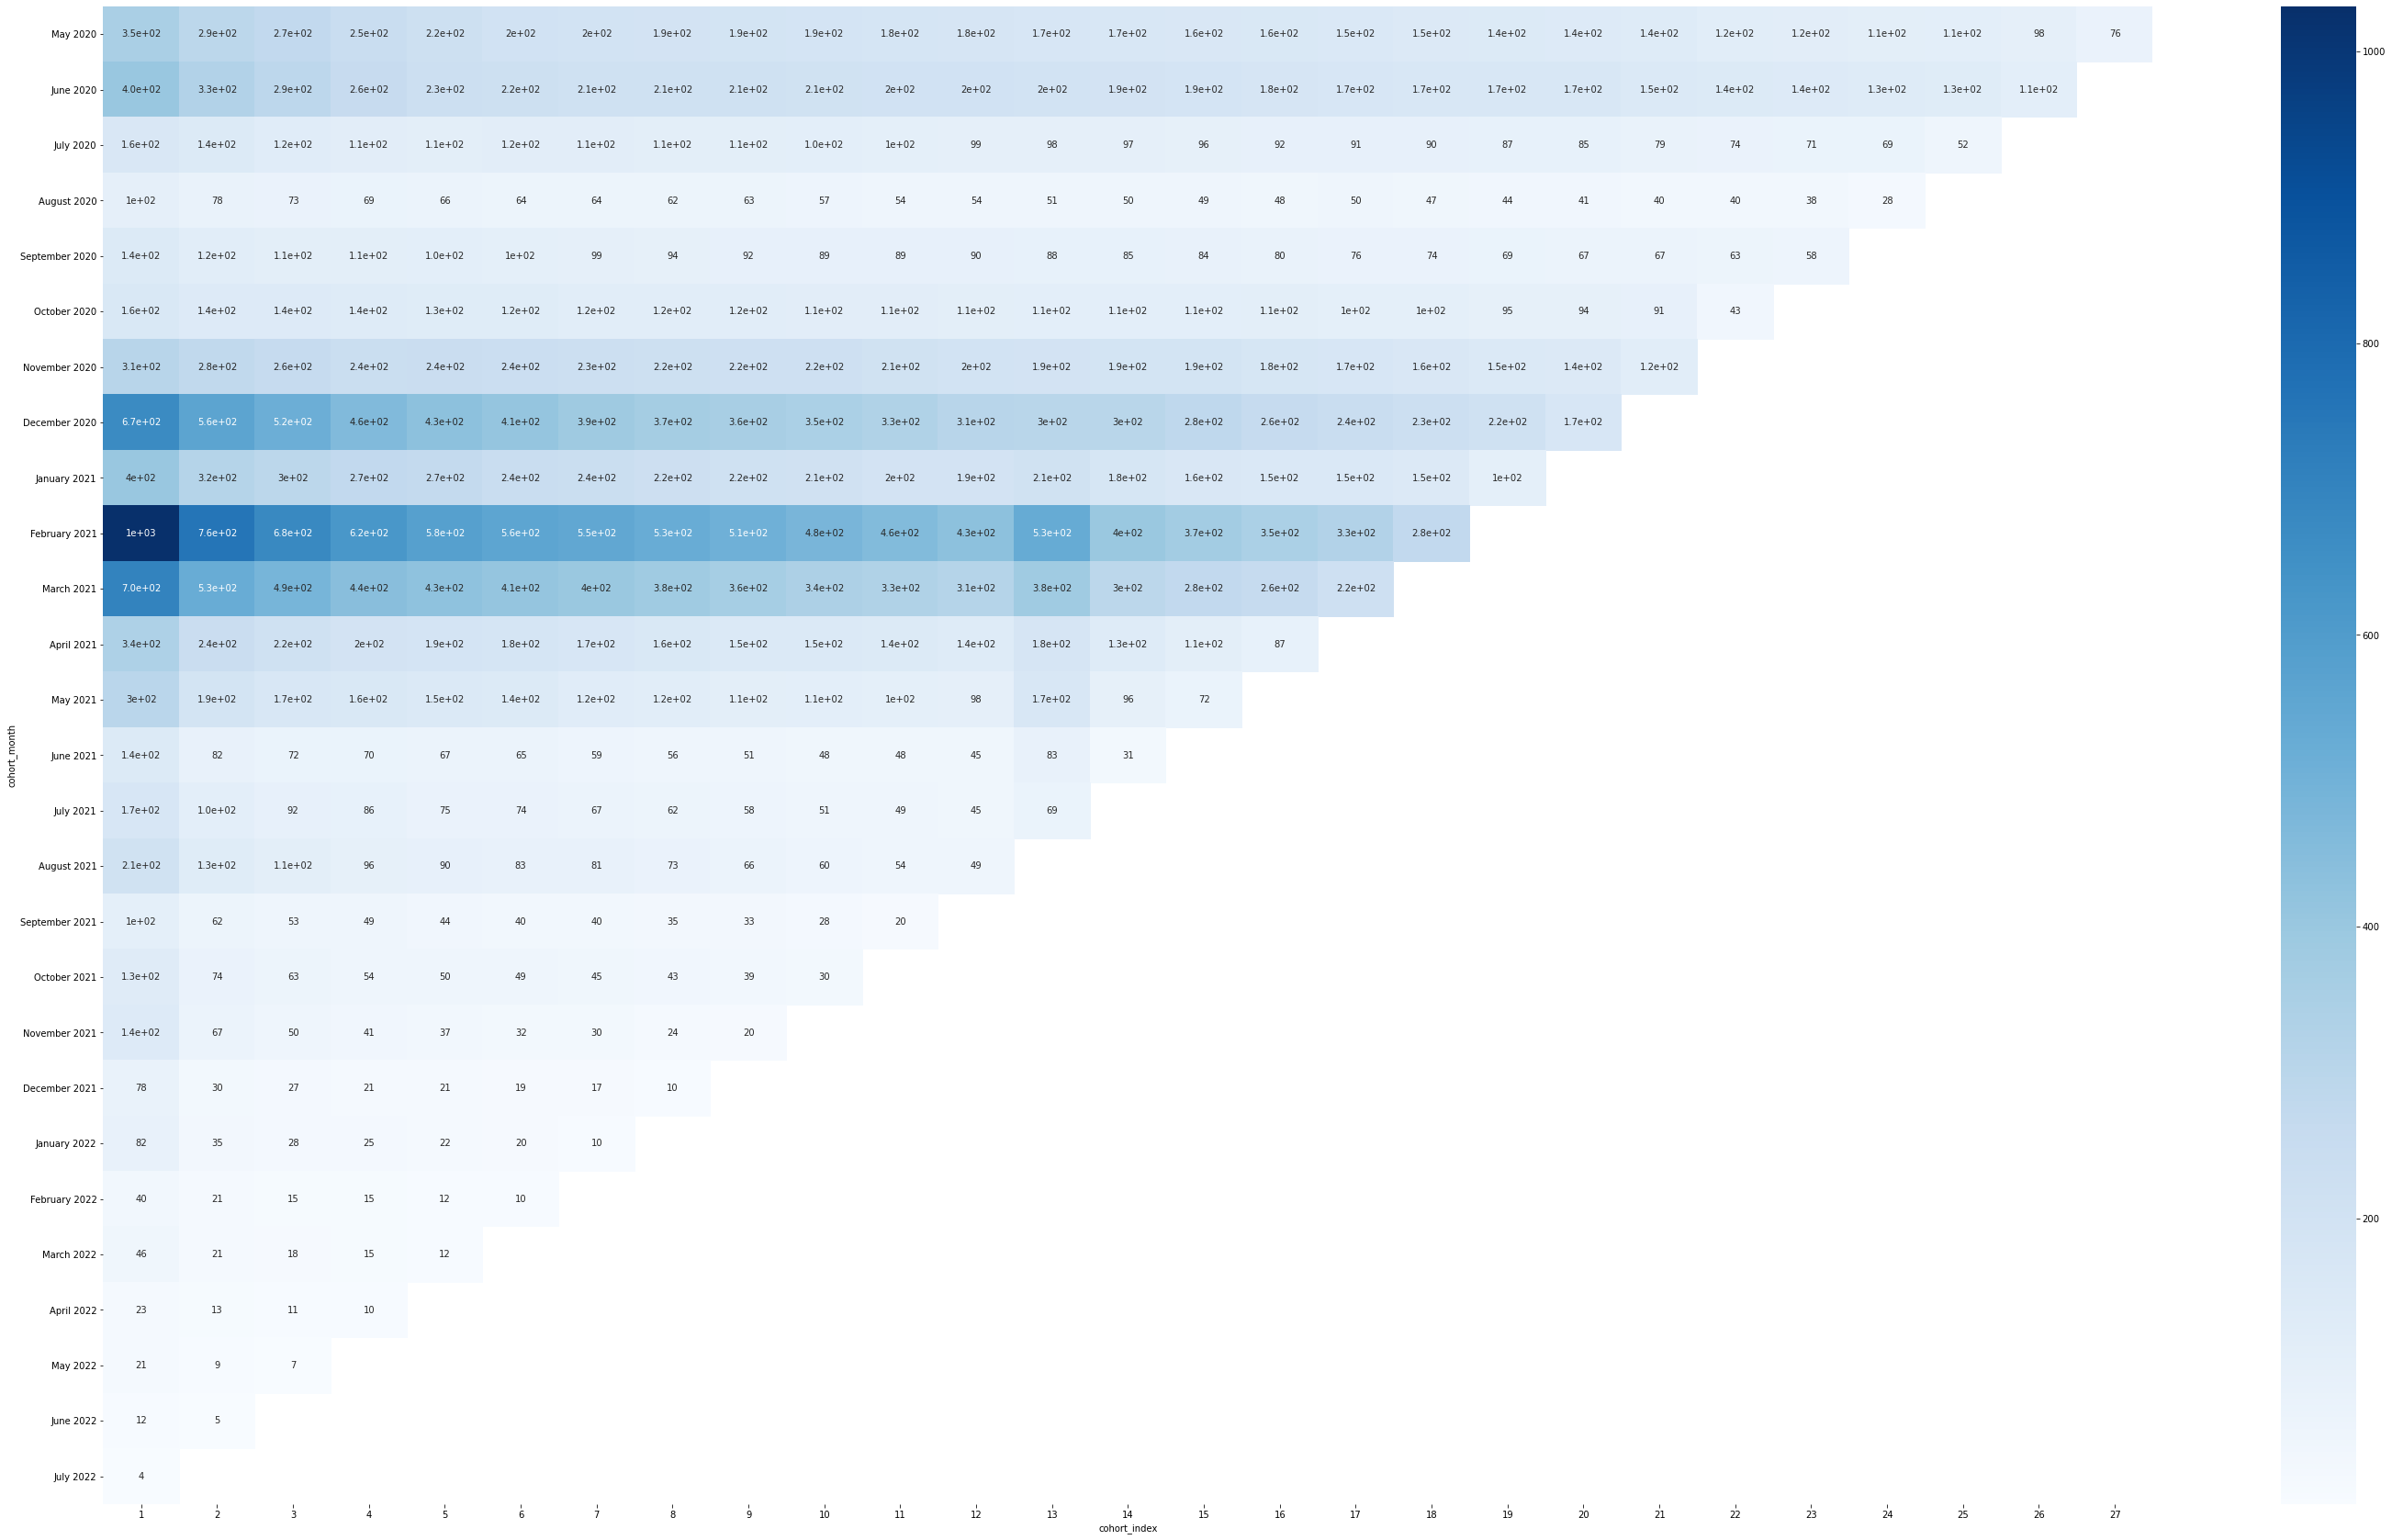

In [22]:
# change index

# visualize results in heatmap
plt.figure(figsize=(50,30))
sns.heatmap(cohort_table, annot=True,cmap='Blues')

In [23]:
# cohort table for percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
cohort_month,,,,,,,,,,,,,,,,,,,,,
May 2020,1.0,0.837607,0.780627,0.700855,0.635328,0.581197,0.569801,0.552707,0.541311,0.529915,...,0.415954,0.401709,0.396011,0.384615,0.341880,0.327635,0.313390,0.301994,0.279202,0.216524
June 2020,1.0,0.809877,0.713580,0.637037,0.565432,0.553086,0.528395,0.525926,0.528395,0.508642,...,0.409877,0.409877,0.409877,0.370370,0.355556,0.343210,0.330864,0.313580,0.261728,NaN
July 2020,1.0,0.859756,0.750000,0.695122,0.676829,0.701220,0.689024,0.682927,0.670732,0.640244,...,0.548780,0.530488,0.518293,0.481707,0.451220,0.432927,0.420732,0.317073,NaN,NaN
August 2020,1.0,0.780000,0.730000,0.690000,0.660000,0.640000,0.640000,0.620000,0.630000,0.570000,...,0.470000,0.440000,0.410000,0.400000,0.400000,0.380000,0.280000,NaN,NaN,NaN
September 2020,1.0,0.826389,0.777778,0.763889,0.729167,0.701389,0.687500,0.652778,0.638889,0.618056,...,0.513889,0.479167,0.465278,0.465278,0.437500,0.402778,NaN,NaN,NaN,NaN
October 2020,1.0,0.886076,0.867089,0.854430,0.803797,0.791139,0.746835,0.740506,0.740506,0.715190,...,0.639241,0.601266,0.594937,0.575949,0.272152,NaN,NaN,NaN,NaN,NaN
November 2020,1.0,0.909091,0.853896,0.775974,0.788961,0.762987,0.746753,0.720779,0.714286,0.714286,...,0.529221,0.493506,0.470779,0.386364,NaN,NaN,NaN,NaN,NaN,NaN
December 2020,1.0,0.839286,0.769345,0.688988,0.639881,0.610119,0.575893,0.547619,0.535714,0.514881,...,0.340774,0.319940,0.254464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
January 2021,1.0,0.779703,0.732673,0.675743,0.658416,0.606436,0.586634,0.556931,0.532178,0.517327,...,0.363861,0.254950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='cohort_index', ylabel='cohort_month'>

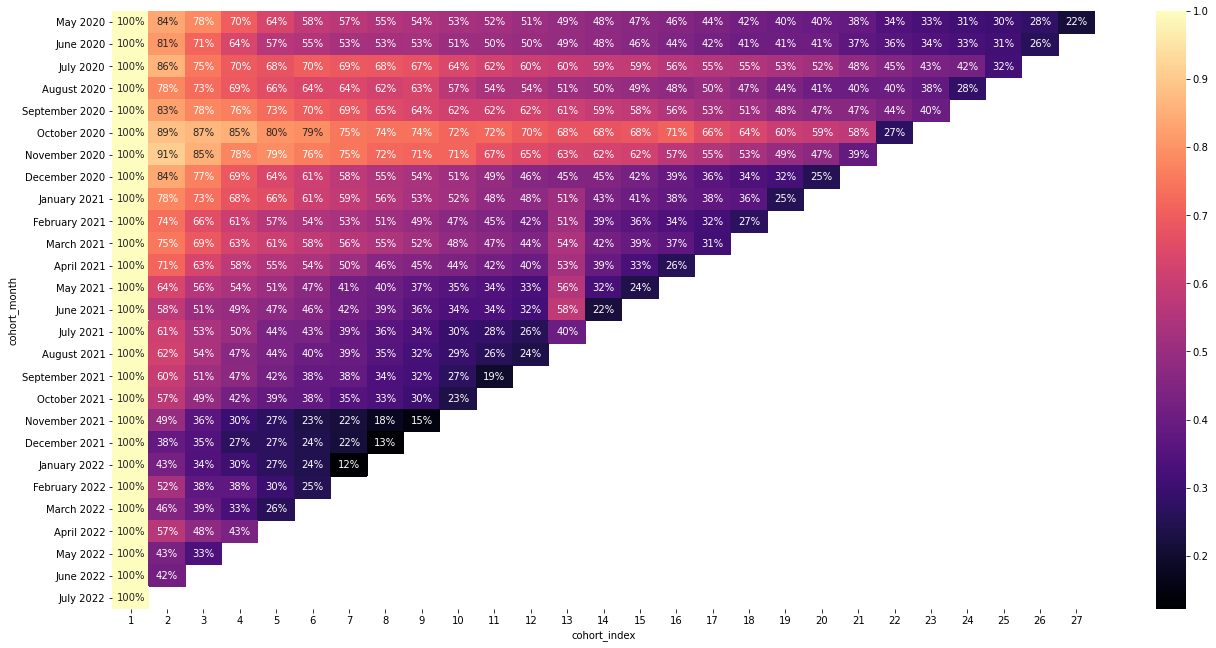

In [24]:
#create percentage visual
plt.figure(figsize=(22,11))
sns.heatmap(new_cohort_table, annot=True,cmap='magma',fmt='.0%')

In [25]:
data.head()

,trans_id,created_date,expires_date,user_id,product_name,payment_method,sub_id,amount,status,coupon_id,user_ctry,user_logins,on_discord,hear_about,trans_month,cohort_month,cohort_index
0,3,2020-05-08 01:43:00,6/8/2020 23:59,4.0,ROIC Monthly,Debit/Credit Card (Stripe),2,6.99,complete,0,US,50,0,Unknown,2020-05-01,2020-05-01,1
1,7,2020-05-09 18:29:00,6/9/2020 23:59,6.0,ROIC Monthly,Debit/Credit Card (Stripe),5,7.49,complete,0,US,49,0,Unknown,2020-05-01,2020-05-01,1
2,9,2020-05-09 19:15:00,6/9/2020 23:59,7.0,ROIC Monthly,Debit/Credit Card (Stripe),6,7.49,complete,0,US,14,0,Unknown,2020-05-01,2020-05-01,1
3,12,2020-05-09 20:38:00,6/9/2020 23:59,9.0,ROIC Monthly,Debit/Credit Card (Stripe),8,7.49,complete,0,GB,3,0,Unknown,2020-05-01,2020-05-01,1
4,15,2020-05-09 21:10:00,6/9/2020 23:59,11.0,ROIC Monthly,Debit/Credit Card (Stripe),10,7.49,pending,2356,US,1,0,Unknown,2020-05-01,2020-05-01,1


In [26]:
data.to_csv('C:/Users/kenre/MSBA_Capstone_Python/new_trans_data.csv', index=False)